In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
data = pd.read_csv(r'diabetes.csv')

### Explore Data

In [34]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
35,4,103,60,33,192,24.0,0.966,33,0
283,7,161,86,0,0,30.4,0.165,47,1
34,10,122,78,31,0,27.6,0.512,45,0
205,5,111,72,28,0,23.9,0.407,27,0
220,0,177,60,29,478,34.6,1.072,21,1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
data.duplicated().sum()

np.int64(0)

<Axes: >

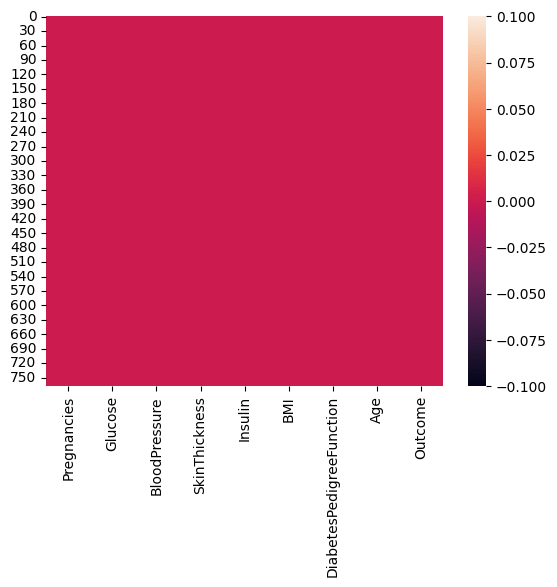

In [38]:
sns.heatmap(data.isna())

### Data Analysis

<Axes: >

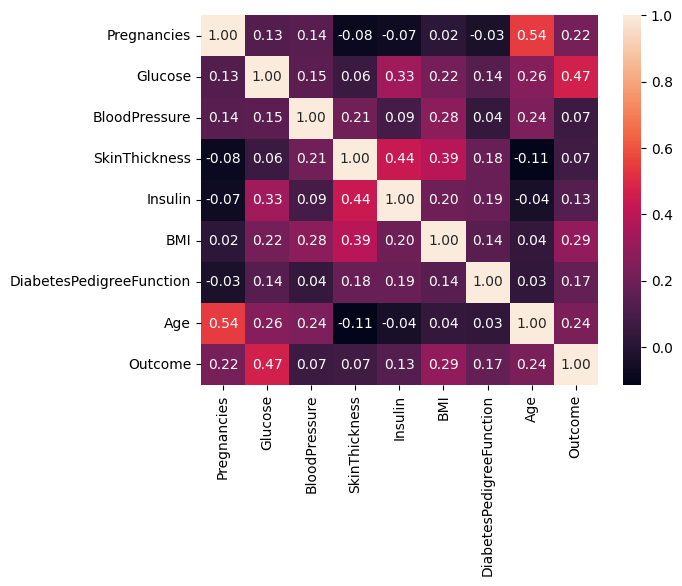

In [39]:
sns.heatmap(data.corr(),annot=True,fmt='0.2f')

<Axes: xlabel='Outcome', ylabel='count'>

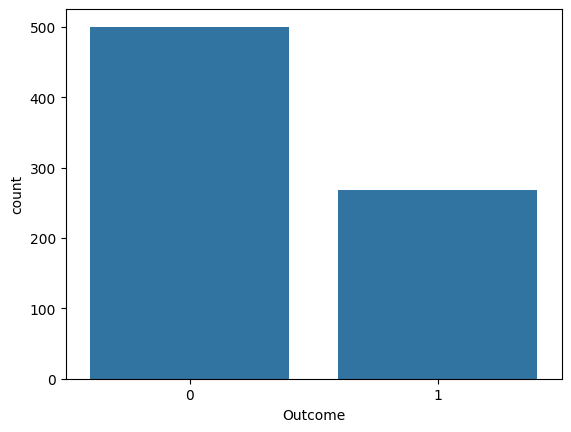

In [40]:
sns.countplot(x ='Outcome',data = data)

<Axes: title={'center': 'Box Plot'}, xlabel='Pregnancies'>

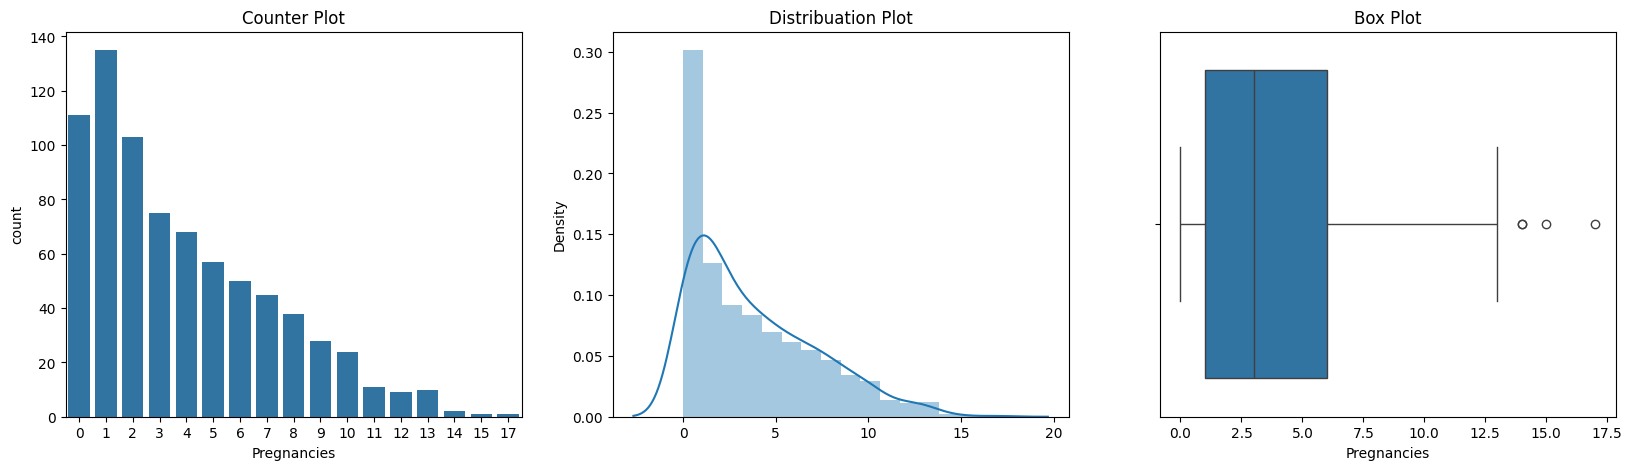

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Counter Plot')
sns.countplot(x='Pregnancies',data = data)

plt.subplot(1, 3, 2)
plt.title("Distribuation Plot")
sns.distplot(x=data["Pregnancies"])

plt.subplot(1, 3, 3)
plt.title("Box Plot")
sns.boxplot(x=data["Pregnancies"])

<Axes: ylabel='Age'>

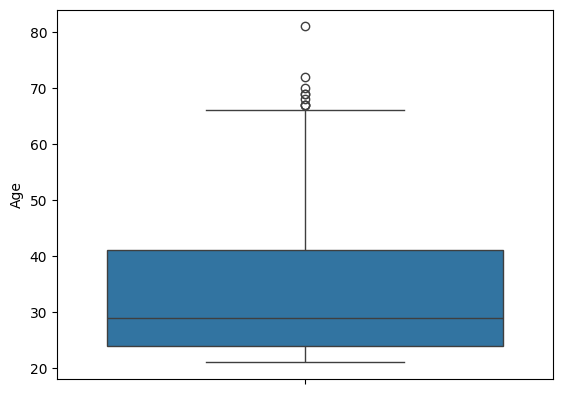

In [42]:
sns.boxplot(data.Age)

### ML Model

In [43]:
x = data.drop("Outcome",axis=1)
y = data["Outcome"]

In [44]:
x_train ,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [45]:
def cal(model):
    model.fit(x_train,y_train)
    pre = model.predict(x_test)
    accuracy = accuracy_score(pre,y_test)
    recall = recall_score(pre,y_test)
    f1 = f1_score(pre,y_test)
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print(f"Accuracy : {accuracy},recall : {recall}, f1 : {f1}")

LogisticRegression()
Accuracy : 0.7467532467532467,recall : 0.6666666666666666, f1 : 0.5714285714285714


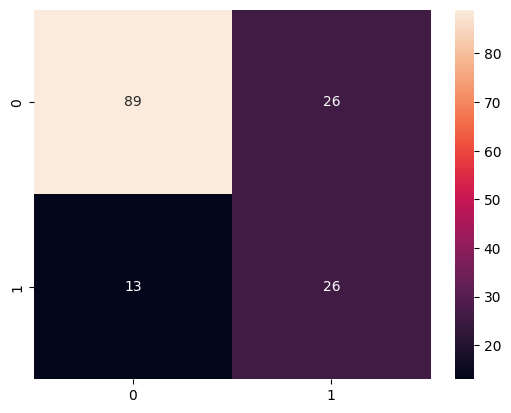

In [46]:
model1 = LogisticRegression()
cal(model1)

SVC()
Accuracy : 0.7467532467532467,recall : 0.696969696969697, f1 : 0.5411764705882353


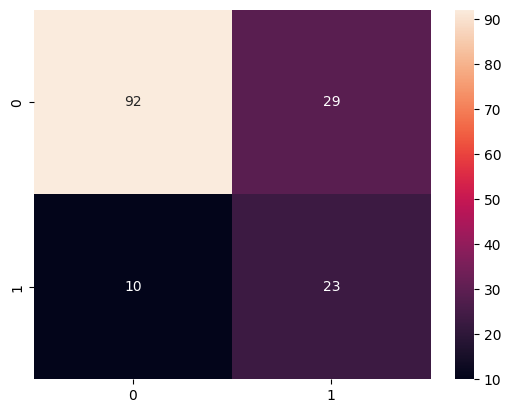

In [47]:
model2 = SVC()
cal(model2)

RandomForestClassifier()
Accuracy : 0.7792207792207793,recall : 0.6956521739130435, f1 : 0.6530612244897959


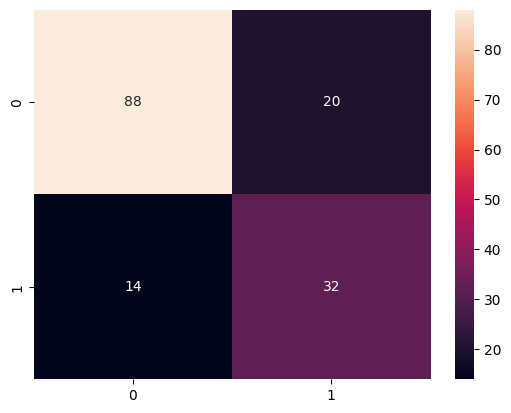

In [48]:
model3 = RandomForestClassifier()
cal(model3)

GradientBoostingClassifier()
Accuracy : 0.7467532467532467,recall : 0.6444444444444445, f1 : 0.5979381443298969


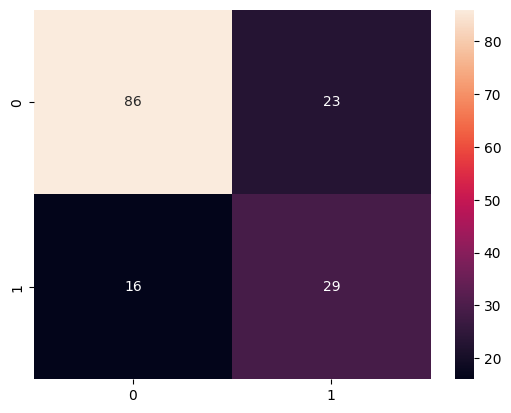

In [49]:
model4 = GradientBoostingClassifier()
cal(model4)